### General functions


In [15]:
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from datetime import datetime, timedelta

my_username = 'SAMPLE USERNAME' # replace this with username
password = 'SAMPLE PASSWORD' # replace this with password

bold_start = '\033[1m'
bold_end = '\033[0m'

def login_instagram(usr, pwd):
    username_input = driver.find_element_by_name('username')
    password_input = driver.find_element_by_name('password')
    username_input.send_keys(usr)
    password_input.send_keys(pwd)
    password_input.submit()
    try:
        wait = WebDriverWait(driver, 10)
        wait.until(EC.presence_of_element_located((By.XPATH, "//div[@role = 'dialog']")))
        dismiss_notification()
    except:
        pass
    
def search_insta(search_term):
    #clear search field
    wait = WebDriverWait(driver, 10)
    search_input = wait.until(EC.presence_of_element_located((By.XPATH, "//input[@placeholder = 'Search']")))
    search_input.clear()
    
    search_box_activation = driver.find_element_by_xpath("//section//input/following-sibling::div").click()
    search_input.send_keys(search_term)
    list_of_profiles = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//section//input/parent::*/div/div/div/a")))
    time.sleep(2)
    return list_of_profiles

def close_search_field():
    driver.find_element_by_class_name("coreSpriteSearchClear").click()

def dismiss_notification():
    driver.find_element_by_xpath("//div[@role = 'dialog']//button[last()]").click()
    

def get_insta_handle_list(list_of_profiles):
    insta_handles = []
    for i in list_of_profiles:
        d = BeautifulSoup(i.get_attribute('innerHTML'), 'html.parser')
        name = d.find_all('span')
        if(len(name) == 3):
            insta_handles.append(name[1].get_text())
    return insta_handles

def click_on_profile_by_username(list_of_profiles, username):
    for i in list_of_profiles:
        profile_container = BeautifulSoup(i.get_attribute('innerHTML'), 'html.parser')
        spans = profile_container.find_all('span')
        if(len(spans) == 3): 
            if(spans[1].get_text() == username):
                i.click()
                break;                

def follow_handle():
    a = driver.find_element_by_xpath("//header//section//button")
    btn_text = a.get_attribute('innerHTML')
    a.click()
        
def unfollow_handle():
    driver.find_element_by_xpath("//header//section//button").click()
    driver.implicitly_wait(2)
    btns =  driver.find_elements_by_tag_name("button")
    btns[len(btns)-2].click()
    
def is_follopwing():
    a = driver.find_element_by_xpath("//header//section//button")
    btn_text = a.get_attribute('innerHTML')
    if(btn_text == 'Follow'):
        return False
    else:
        return True
        
def toggle_like_btn():
    wait = WebDriverWait(driver, 10)
    btn = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@role = 'dialog']/article//section//button")))
    btn.click()


def go_to_next_post():
    btn = driver.find_element_by_class_name("coreSpriteRightPaginationArrow")
    btn.click()
    
def go_to_prev_post():
    btn = driver.find_element_by_class_name("coreSpriteLeftPaginationArrow")
    btn.click()
    
def get_time_of_post():
    wait = WebDriverWait(driver, 10)
    btn = wait.until(EC.presence_of_element_located((By.TAG_NAME, "time")))
    return btn.get_attribute('dateTime')
    
def is_post_liekd():
    wait = WebDriverWait(driver, 10)
    like = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@role = 'dialog']/article//section//button/span")))
    like_txt = like.get_attribute('aria-label')
    if(like_txt == 'Like'):
        return False
    else:
        return True

def click_on_latest_post():
    wait = WebDriverWait(driver, 10)
    btn = wait.until(EC.presence_of_element_located((By.XPATH, "//article//a")))
    btn.click()
    
def is_current_page(usrname):
    try:
        insta_handle_heading = driver.find_element_by_tag_name("h1")
        if(insta_handle_heading.get_attribute('innerHTML') == usrname):
            return True
        else:
            return False
    except:
        return False
def close_post():
    btns = driver.find_elements_by_xpath("//div[@role = 'dialog']//button")
    btns[len(btns) - 2].click()

def go_to_my_profile(username):
    link = '/' + username + '/'
    driver.find_element_by_xpath("//a[@href = '" + link + "']").click()
    wait = WebDriverWait(driver, 10)
    wait.until(EC.text_to_be_present_in_element((By.TAG_NAME, "h1"), username))


def get_followers(n):
    driver.find_element_by_partial_link_text('followers').click()
    time.sleep(3)
    actions = ActionChains(driver)
    
    while(True):
        wait = WebDriverWait(driver, 10)
        modal_body = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@role = 'dialog']//ul/parent::*")))
        actions.move_to_element_with_offset(modal_body, 0, 0)
        actions.click()
        actions.perform()
        
        actions.send_keys(Keys.SPACE)
        followers_list = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//div[@role = 'dialog']//ul/div/li")))
        if(len(followers_list) >= n):
            break
            
    followers_list = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//div[@role = 'dialog']//ul/div/li")))
    return followers_list[0:n]

def get_username_of_followers(followers_list):
    followers_usernames = []
    for i in followers_list:
        d = BeautifulSoup(i.get_attribute('innerHTML'), 'html.parser')
        username = d.a.attrs['href'].split("/")[1]    
        followers_usernames.append(username)
    return followers_usernames


def close_followers_dialog():
    driver.find_element_by_xpath("//span[@aria-label = 'Close']").click()

def is_there_story():
    try:
        btn = driver.find_element_by_xpath("//header//div[@role = 'button']")
        b = BeautifulSoup(btn.get_attribute('outerHTML'), 'html.parser')
        if(b.div.attrs['class'][1] == ''):
            return False
        return True
    except:
        return False

def click_on_story():
     driver.find_element_by_xpath("//header//span[@role = 'link']/img").click() 

def get_number_of_followers():
    a = driver.find_element_by_partial_link_text('followers')
    n = BeautifulSoup(a.get_attribute('innerHTML'), 'html.parser').span.attrs['title']
    return int("".join(n.split(',')))

def story_seen():
    canvas = driver.find_element_by_tag_name("canvas")
    c = BeautifulSoup(canvas.get_attribute('outerHTML'), 'html.parser')
    h = c.canvas.attrs['height']
    w = c.canvas.attrs['width']
    if(h == '182' or h == '336'):
        return False
    else:
        return True


def is_post_3_days_old(pd):
    post_date = datetime.strptime(pd, "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%Y-%m-%d")
    date_3_days_ago = (datetime.now() - timedelta(days=3)).strftime("%Y-%m-%d")
    if(post_date >= date_3_days_ago):
        return True
    return False

def get_number_likes():
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.TAG_NAME, "h2")))
    try:
        # This captures the approx like count when it says 'others'. 
        view_id = '//article//section[2]/div/div[2]//span'
        likes = driver.find_element_by_xpath(view_id).text

    except:
       # This captures the standard like/count. 
        view_id = '//article//section[2]/div//span'
        likes = driver.find_element_by_xpath(view_id).text
        l = likes.split(" ")
        if(len(l) == 1):
            likes = "".join(l[0].split(","))
        else:
            likes = 0
            
    return int(likes)

def go_to_page(username):
    if(not is_current_page(username)):
        tag_list = search_insta(username)
        click_on_profile_by_username(tag_list, username)
        
    wait = WebDriverWait(driver, 20)
    wait.until(EC.text_to_be_present_in_element((By.TAG_NAME, "h1"), username))
    
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def scrape_post():
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.TAG_NAME, "h2")))
    content = driver.find_element_by_xpath("//div//li[@role = 'menuitem']/div/div/div[2]/span")
    word_list = []
    line = content.text.split("\n")
    for w in line:
        l = w.split(" ")
        for w1 in l:
            word_list.append(deEmojify(w1).lower())

    return word_list

In [13]:
driver = webdriver.Chrome(executable_path = '/Users/smriti/Downloads/chromedriver')
driver.get('https://www.instagram.com/accounts/login/?hl=en')

In [16]:
login_instagram(my_username, password)

### 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

#### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [18]:
def get_first_10_handles(insta_handle):
    food_list = search_insta(insta_handle)
    food_insta_handles = get_insta_handle_list(food_list)[0:10]
    close_search_field()
    return food_insta_handles
    
def get_followers_of_all_handles(food_insta_handles):
    followers_username_list = []
    for username in food_insta_handles:
        go_to_page(username)
        num_of_followers = get_number_of_followers()
        followers_username_list.append((num_of_followers, username))
    return followers_username_list

def get_top_5_handles_with_max_followers(followers_username_list):
    followers_username_list.sort(reverse = True)
    top_5_usernames = followers_username_list[0:5].copy()
    return top_5_usernames

food_insta_handles = get_first_10_handles('food')
followers_username_list = get_followers_of_all_handles(food_insta_handles)
top_5_usernames = get_top_5_handles_with_max_followers(followers_username_list)

print(bold_start, "Top 5 which have the highest number of followers", bold_end)
for usr in top_5_usernames:
    print("Username: ", usr[1], " | ", 'Number of Followers: ', usr[0])


 Top 5 which have the highest number of followers 
Username:  foodys  |  Number of Followers:  9970847
Username:  foodtalkindia  |  Number of Followers:  282032
Username:  foodofmumbai  |  Number of Followers:  209001
Username:  foodwithzen  |  Number of Followers:  156386
Username:  foodie_incarnate  |  Number of Followers:  133750


#### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [19]:
def get_num_of_posts(top_5_usernames):
    d = {}
    for user in top_5_usernames:
        username = user[1]
        go_to_page(username)
        click_on_latest_post()
        pd = get_time_of_post()
        while(is_post_3_days_old(pd)):
            d[username] = d.get(username, 0) + 1
            go_to_next_post()
            pd = get_time_of_post()
        close_post()
    username_posts = list(d.items())
    return username_posts

username_posts = get_num_of_posts(top_5_usernames)
                
print(bold_start, "Username and Number of posts in last 3 days", bold_end)
for usr in username_posts:
    print("Username: ", usr[0], " | ", 'Number of posts in prev 3 days: ', usr[1])

 Username and Number of posts in last 3 days 
Username:  foodys  |  Number of posts in prev 3 days:  7
Username:  foodtalkindia  |  Number of posts in prev 3 days:  8
Username:  foodofmumbai  |  Number of posts in prev 3 days:  3
Username:  foodwithzen  |  Number of posts in prev 3 days:  3
Username:  foodie_incarnate  |  Number of posts in prev 3 days:  8


#### 1.3 Depict this information using a suitable graph.

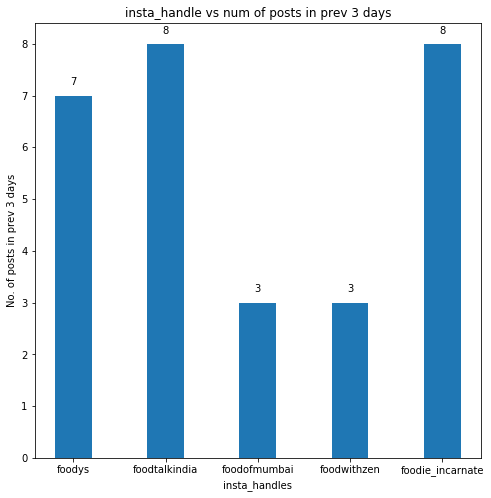

In [21]:
import matplotlib.pyplot as plt

def create_bar_graph(x, y, w=0.4, xlabel="x", ylabel="y", title="X vs Y Bar Graph", showText=False, yshift_value = 0.2):
    plt.figure(figsize=(8,8))
    plt.bar(x, y, width=w)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=0)
    if showText:
        for i in range(len(y)):
            plt.text(x[i], y[i] + yshift_value, y[i], horizontalalignment='center')
    plt.show()
x = [ usr[0] for usr in username_posts ] 
y = [ usr[1] for usr in username_posts ] 
create_bar_graph(x,y, 
                 xlabel = 'insta_handles',
                 ylabel = 'No. of posts in prev 3 days', 
                 showText= True, 
                 title = 'insta_handle vs num of posts in prev 3 days')


### 2. Your friend also needs a list of hashtags that he should use in his posts.

#### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
#### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [22]:
# I have scraped and calculated frequency together.
import pandas as pd

words = {}

def create_word_freq(word_list):
    for word in word_list:
        words[word] = words.get(word, 0) + 1 
    
for usr in top_5_usernames:
    username = usr[1]
    
    go_to_page(username)
    click_on_latest_post()
        
    for i in range(10):
        word_list = scrape_post()
        create_word_freq(word_list)
        go_to_next_post()
    close_post()

df = pd.DataFrame.from_records(list(words.items()), columns =['word', 'freq']) 
df

,word,freq
0,guiness,1
1,cheesy,2
2,garlic,4
3,bread,1
4,5/5,5
5,drools!!!!!,1
6,,63
7,-,21
8,@delish,1
9,@tripactions,9


#### 2.3 Create a csv file with two columns : the word and its frequency

In [39]:
df.to_csv('words_freq.csv')

#### 2.4 Now, find the hashtags that were most popular among these bloggers

In [25]:
def only_hastags(word):
    if(len(word) > 0 and word[0] == '#'):
        return word
    return "None"
    
df.word = df.word.apply(only_hastags)
df = df[df['word'] != "None"]
df = df.sort_values('freq',ascending=False)
df.reset_index(inplace=True, drop = True)
# taking top 10 most popular hastags 
df.head(10)

,word,freq
0,#foodieincarnate,10
1,#foodofmumbai,6
2,#friedchicken,2
3,#spaghetti,2
4,#burger,2
5,#cheese,2
6,#healthyrecipes,1
7,#eatsipshare!,1
8,#discovergurgaon,1
9,#ferrerorocher,1


#### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

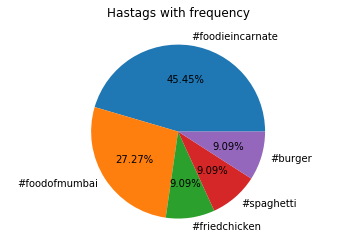

In [26]:
df = df.head(5)

x = []
y = []

for row in df.iterrows():
    x.append(row[1]['word'])
    y.append(row[1]['freq'])
    
plt.axis("equal")
plt.title('Hastags with frequency')
plt.pie(y, labels=x, autopct="%.2f%%")
plt.show()

### 3. You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

#### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [27]:
def get_likes_of_posts_last_3_days(username_posts):
    username_likes = []
    for usr in username_posts:
        username = usr[0]
        r = usr[1]
        go_to_page(username)
        click_on_latest_post()
        total_likes = 0
        for i in range(r):
            total_likes = get_number_likes() + total_likes
            go_to_next_post()
        close_post()
        username_likes.append((username, total_likes, r))
    return username_likes 

username_likes  = get_likes_of_posts_last_3_days(username_posts)

print(bold_start, "Total likes of posts in prev 3 days", bold_end)
for usr in username_likes:
    print("Username: ", usr[0], " | ", 'Number of likes in prev 3 days: ', usr[1])

 Total likes of posts in prev 3 days 
Username:  foodys  |  Number of likes in prev 3 days:  60010
Username:  foodtalkindia  |  Number of likes in prev 3 days:  2188
Username:  foodofmumbai  |  Number of likes in prev 3 days:  3416
Username:  foodwithzen  |  Number of likes in prev 3 days:  19821
Username:  foodie_incarnate  |  Number of likes in prev 3 days:  18330


#### 3.2 Calculate the average likes for a handle.

In [29]:
# calculating avg likes for top 10 posts since it would take a long time to scrape 300+ posts for each insta handle
def cal_avg_likes(username_likes):
    avg_likes = []
    for usr in username_likes:
        avg_likes.append((usr[0], usr[1]/usr[2]))
    return avg_likes

avg_likes = cal_avg_likes(username_likes)

print(bold_start, "Avg likes in prev 3 days", bold_end)
for usr in avg_likes:
    print("Username: ", usr[0], " | ", 'Avg like: ', usr[1])

 Avg likes in prev 3 days 
Username:  foodys  |  Avg like:  8572.857142857143
Username:  foodtalkindia  |  Avg like:  273.5
Username:  foodofmumbai  |  Avg like:  1138.6666666666667
Username:  foodwithzen  |  Avg like:  6607.0
Username:  foodie_incarnate  |  Avg like:  2291.25


#### 3.3  Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [37]:
from fractions import Fraction 

def cal_avg_followers_like_ratio(avg_likes, top_5_usernames):
    followers_like_ratio = []
    for i in range(0,5):
        username = avg_likes[i][0]
        num = top_5_usernames[i][0]
        den = avg_likes[i][1]
        followers_like_ratio.append((username, num/den))
    return followers_like_ratio

followers_like_ratio = cal_avg_followers_like_ratio(avg_likes, top_5_usernames)

print(bold_start, "Followers like ratio", bold_end)
for usr in followers_like_ratio:
    print("Username: ", usr[0], 
          " | ", 'Followers:Like (approx): ', str(Fraction(usr[1]).limit_denominator(100)))

 Followers like ratio 
Username:  foodys  |  Followers:Like (approx):  16283/14
Username:  foodtalkindia  |  Followers:Like (approx):  47435/46
Username:  foodofmumbai  |  Followers:Like (approx):  15051/82
Username:  foodwithzen  |  Followers:Like (approx):  2367/100
Username:  foodie_incarnate  |  Followers:Like (approx):  5779/99


#### 3.4 Create a bar graph to depict the above obtained information. Your project will be evaluated on

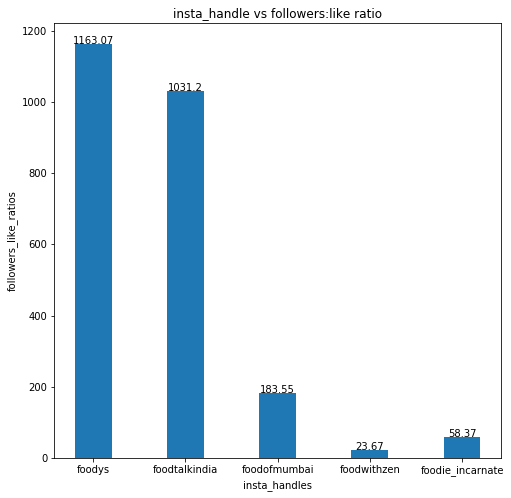

In [36]:
import matplotlib.pyplot as plt

def create_bar_graph(x, y, w=0.4, xlabel="x", ylabel="y", title="X vs Y Bar Graph", showText=False, yshift_value = 0.2):
    plt.figure(figsize=(8,8))
    plt.bar(x, y, width=w)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=0)
    if showText:
        for i in range(len(y)):
            plt.text(x[i], y[i] + yshift_value, y[i], horizontalalignment='center')
    plt.show()
    
x = [ usr[0] for usr in followers_like_ratio ] 
y = [ float('%.2f' % usr[1]) for usr in followers_like_ratio ]

create_bar_graph(x,y, 
                 xlabel = 'insta_handles',
                 ylabel = 'followers_like_ratios', 
                 showText= True, 
                 title = 'insta_handle vs followers:like ratio')
